In [ ]:
#install tensorflow
import tensorflow as tf
print(tf.__version__)

2.11.0


In [ ]:
#import others
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as Axes3D

In [ ]:
#Make dataset
N =1000
#random returns 0-1 in float value
X = np.random.random((N, 2)) * 6 - 3  #uniformly distributed between(-3, 3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

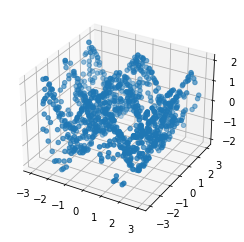

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
#this is just same as y = cos(2x^1)* cos(3x^2)
plt.show()

Build model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2, ), activation=('relu')),
    tf.keras.layers.Dense(1)
])

Compile Model

In [ ]:
from keras import optimizers
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.0359
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0278
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0614
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9840
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9559
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8912
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8328
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7328
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6877
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6725
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5754
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5410
Epoch 13/100
32/32 [=================

Plot Loss

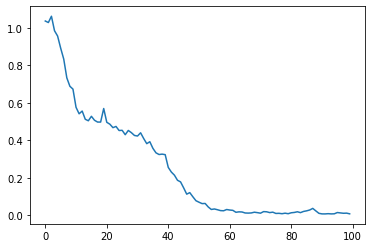

In [ ]:
plt.plot(r.history['loss'], label="Loss")

Plot prediction surface

79/79 [==============================] - 0s 2ms/step


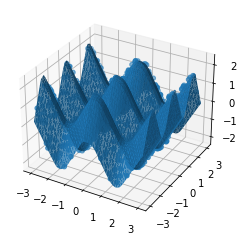

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
#surface plot
line = np.linspace(-3,3,50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

Can it extrapolato

79/79 [==============================] - 0s 3ms/step


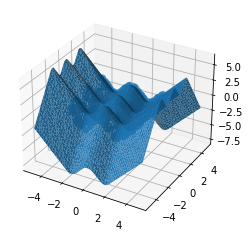

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
#surface plot
line = np.linspace(-5,5,50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

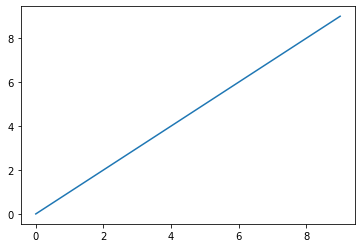